In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
data=pd.read_excel('app_data.xlsx')
data.describe()
# Get the number of columns and rows in the dataframe
num_cols = len(data.columns)
num_rows = len(data.index)

# Print the results
print('Number of columns:', num_cols)
print('Number of rows:', num_rows)

Number of columns: 58
Number of rows: 782


In [3]:
data.head()

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.68,16.9,female,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.10,31.9,male,147.0,69.5,2.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.14,23.3,female,163.0,62.0,4.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.37,20.6,female,165.0,56.0,3.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.08,16.9,female,163.0,45.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 58 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               781 non-null    float64
 1   BMI                               755 non-null    float64
 2   Sex                               780 non-null    object 
 3   Height                            756 non-null    float64
 4   Weight                            779 non-null    float64
 5   Length_of_Stay                    778 non-null    float64
 6   Management                        781 non-null    object 
 7   Severity                          781 non-null    object 
 8   Diagnosis_Presumptive             780 non-null    object 
 9   Diagnosis                         780 non-null    object 
 10  Alvarado_Score                    730 non-null    float64
 11  Paedriatic_Appendicitis_Score     730 non-null    float64
 12  Appendix

In [5]:
data = data.drop(['Appendix_on_US','Appendix_Diameter','Segmented_Neutrophils','Peritonitis',
             'US_Performed','US_Number','Free_Fluids','Appendix_Wall_Layers','Target_Sign','Appendicolith','Perfusion','Perforation',
             'Surrounding_Tissue_Reaction','Appendicular_Abscess','Abscess_Location','Pathological_Lymph_Nodes','Lymph_Nodes_Location',
             'Bowel_Wall_Thickening','Conglomerate_of_Bowel_Loops','Ileus','Coprostasis','Meteorism','Enteritis','Gynecological_Findings'],axis=1)

print('Number of columns:', len(data.columns))
print('Number of rows:', len(data.index))

Number of columns: 34
Number of rows: 782


In [6]:
data = data.dropna(how='all')

In [7]:
import math
data['Age'] = data['Age'].apply(lambda x: math.floor(x))
#data['Age']

In [8]:
data = data.drop(data[data['Age'] <= 4].index)
data.dropna(subset=['Age'], inplace=True)

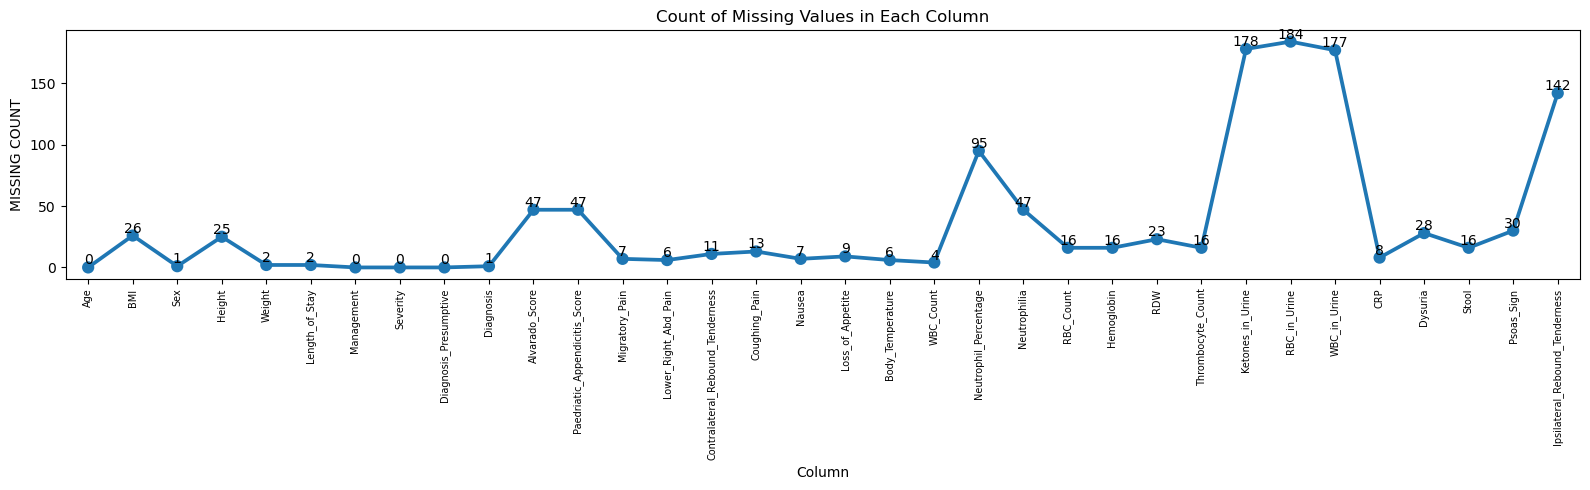

In [9]:
missing = pd.DataFrame(data.isnull().sum()).reset_index()
missing.columns = ['Column', 'MissingCount']

# Proceed with creating the plot
plt.figure(figsize=(16, 5))
ax = sn.pointplot(x='Column', y='MissingCount', data=missing)

# Adding the text labels for each point
for i, count in enumerate(missing['MissingCount']):
    ax.text(i, count, str(count), horizontalalignment='center', verticalalignment='bottom')

plt.xticks(rotation=90, fontsize=7)
plt.title("Count of Missing Values in Each Column")
plt.ylabel("MISSING COUNT")
plt.tight_layout()
plt.show()

In [10]:
# select integer columns
float_cols = list(data.select_dtypes(include=['float']).columns)
cat_cols = list(data.select_dtypes(include=['object']).columns)
print("Numerical:",len(float_cols))
print("categorical:",len(cat_cols))
print('float:',float_cols)
print('categorical:',cat_cols)

Numerical: 14
categorical: 19
float: ['BMI', 'Height', 'Weight', 'Length_of_Stay', 'Alvarado_Score', 'Paedriatic_Appendicitis_Score', 'Body_Temperature', 'WBC_Count', 'Neutrophil_Percentage', 'RBC_Count', 'Hemoglobin', 'RDW', 'Thrombocyte_Count', 'CRP']
categorical: ['Sex', 'Management', 'Severity', 'Diagnosis_Presumptive', 'Diagnosis', 'Migratory_Pain', 'Lower_Right_Abd_Pain', 'Contralateral_Rebound_Tenderness', 'Coughing_Pain', 'Nausea', 'Loss_of_Appetite', 'Neutrophilia', 'Ketones_in_Urine', 'RBC_in_Urine', 'WBC_in_Urine', 'Dysuria', 'Stool', 'Psoas_Sign', 'Ipsilateral_Rebound_Tenderness']


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

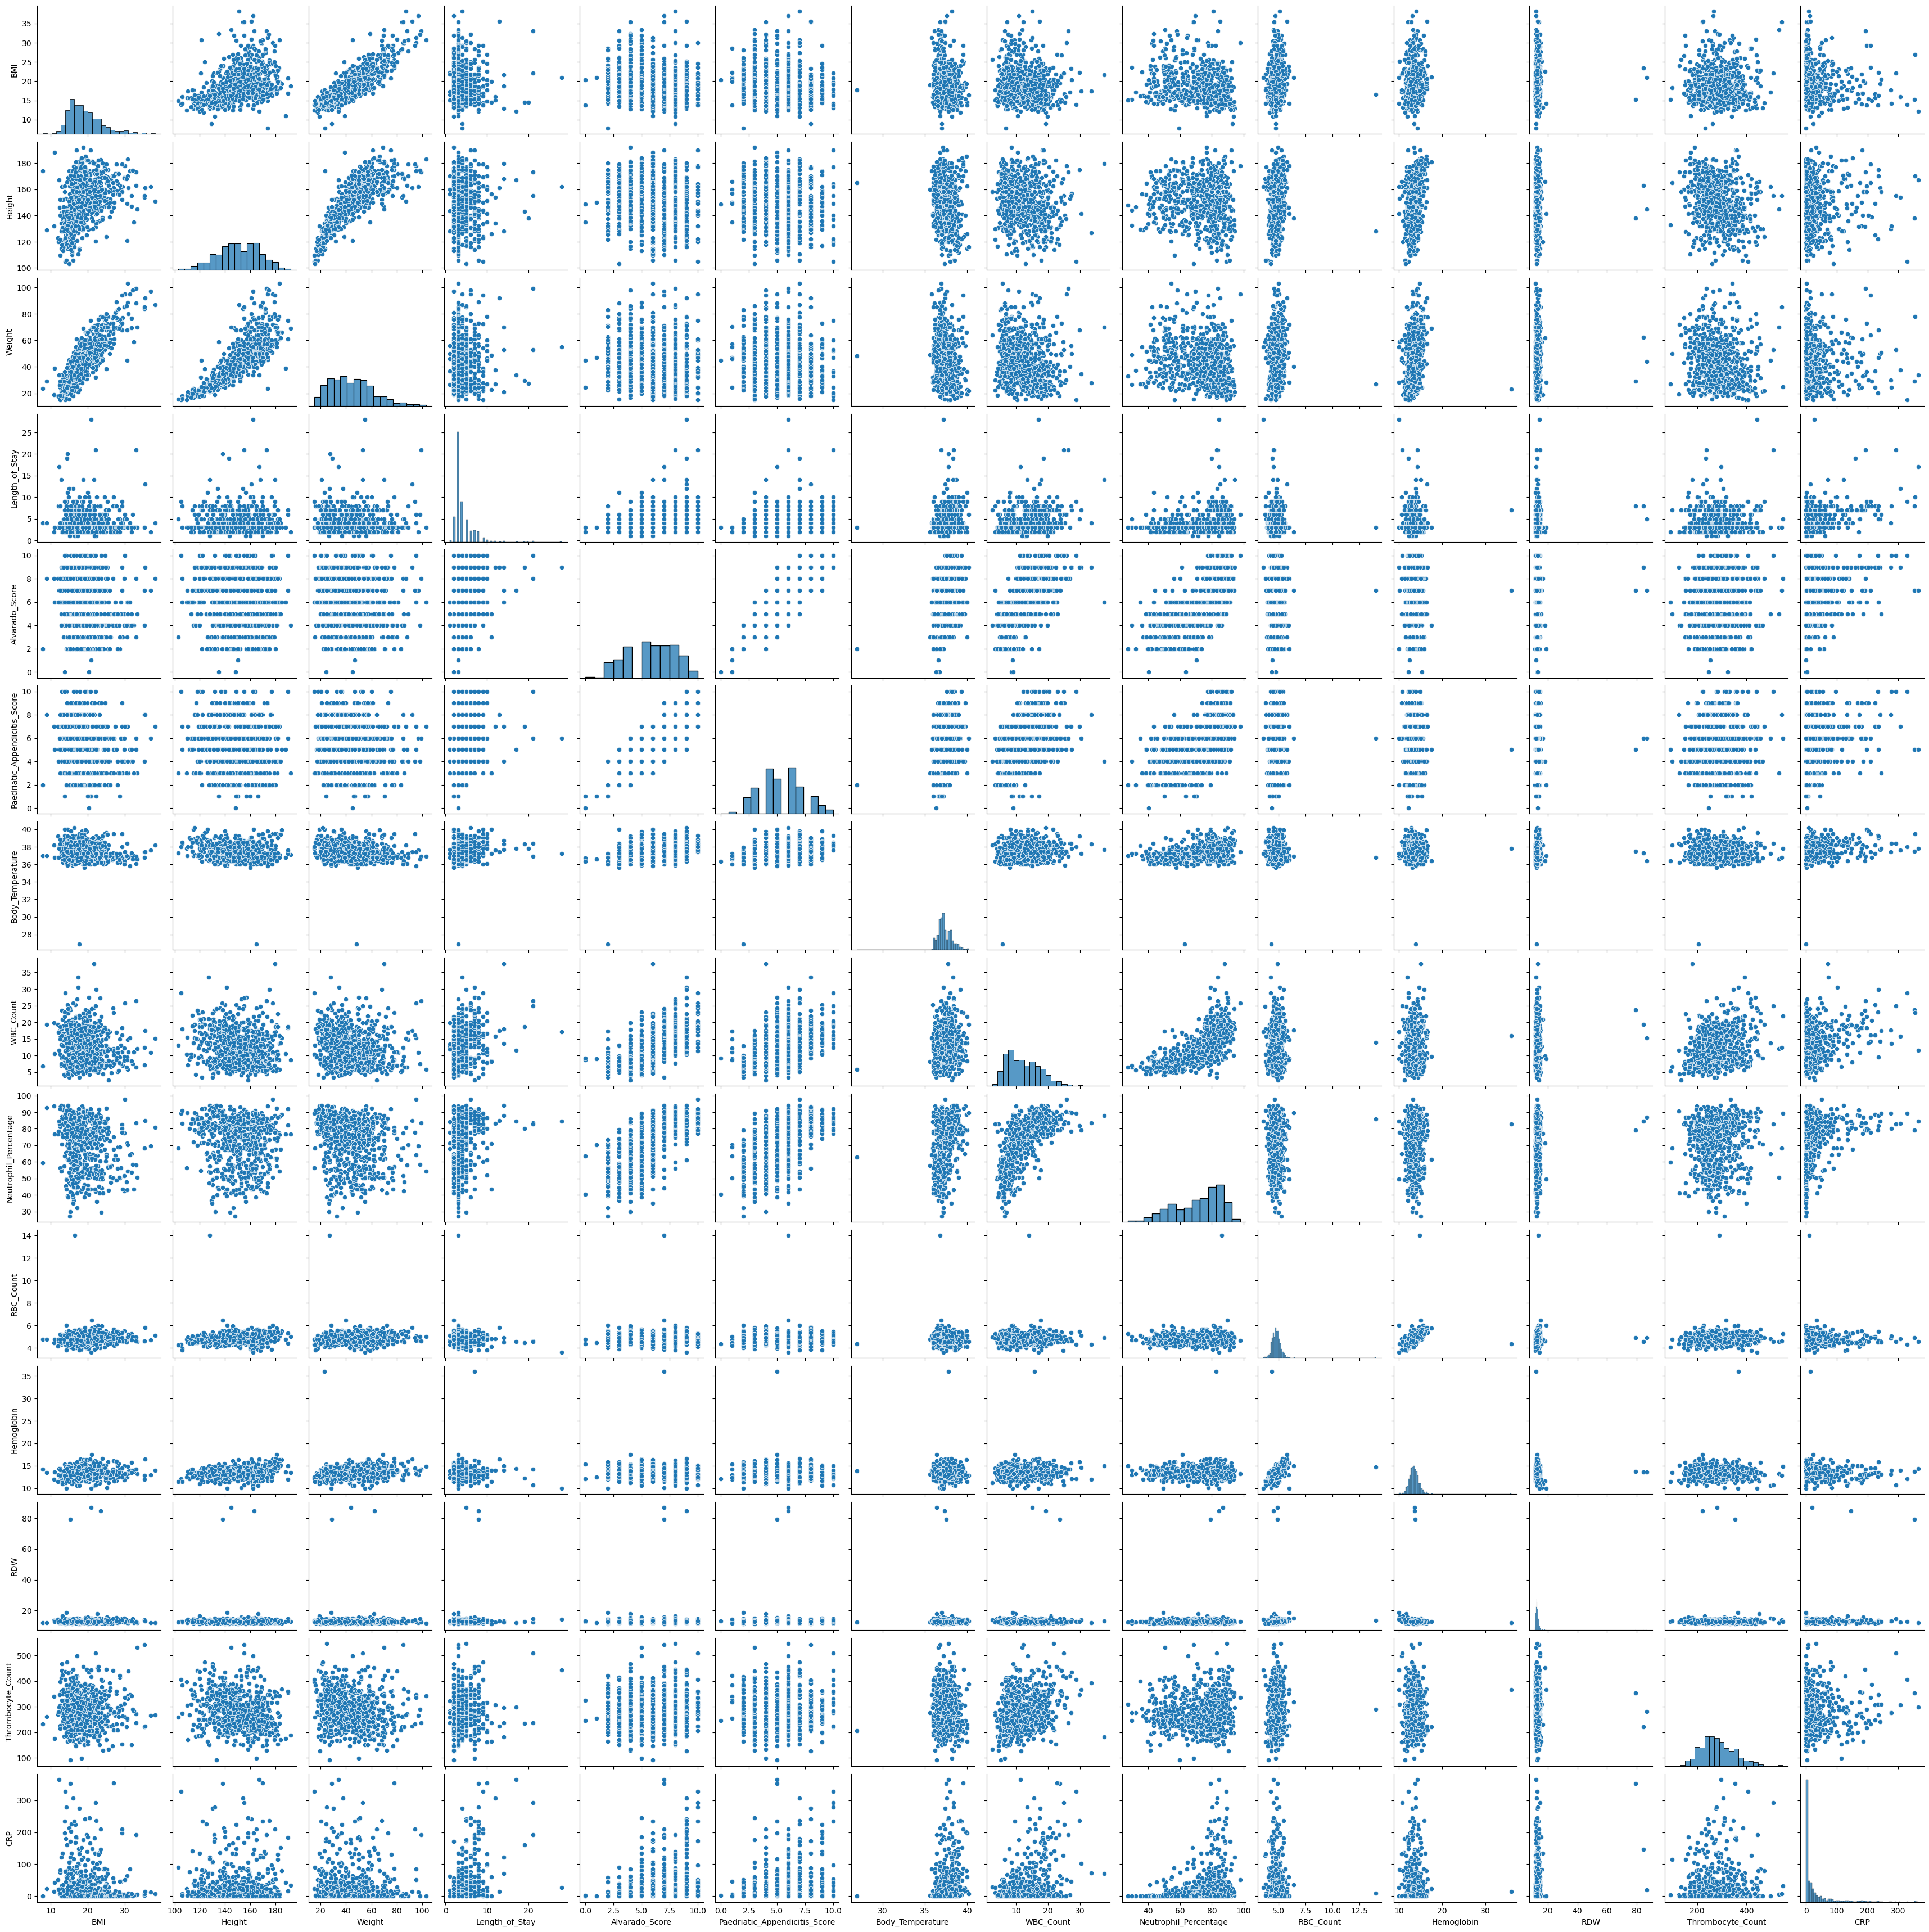

In [11]:
# Pair plot
sn.pairplot(data[float_cols])
plt.show()

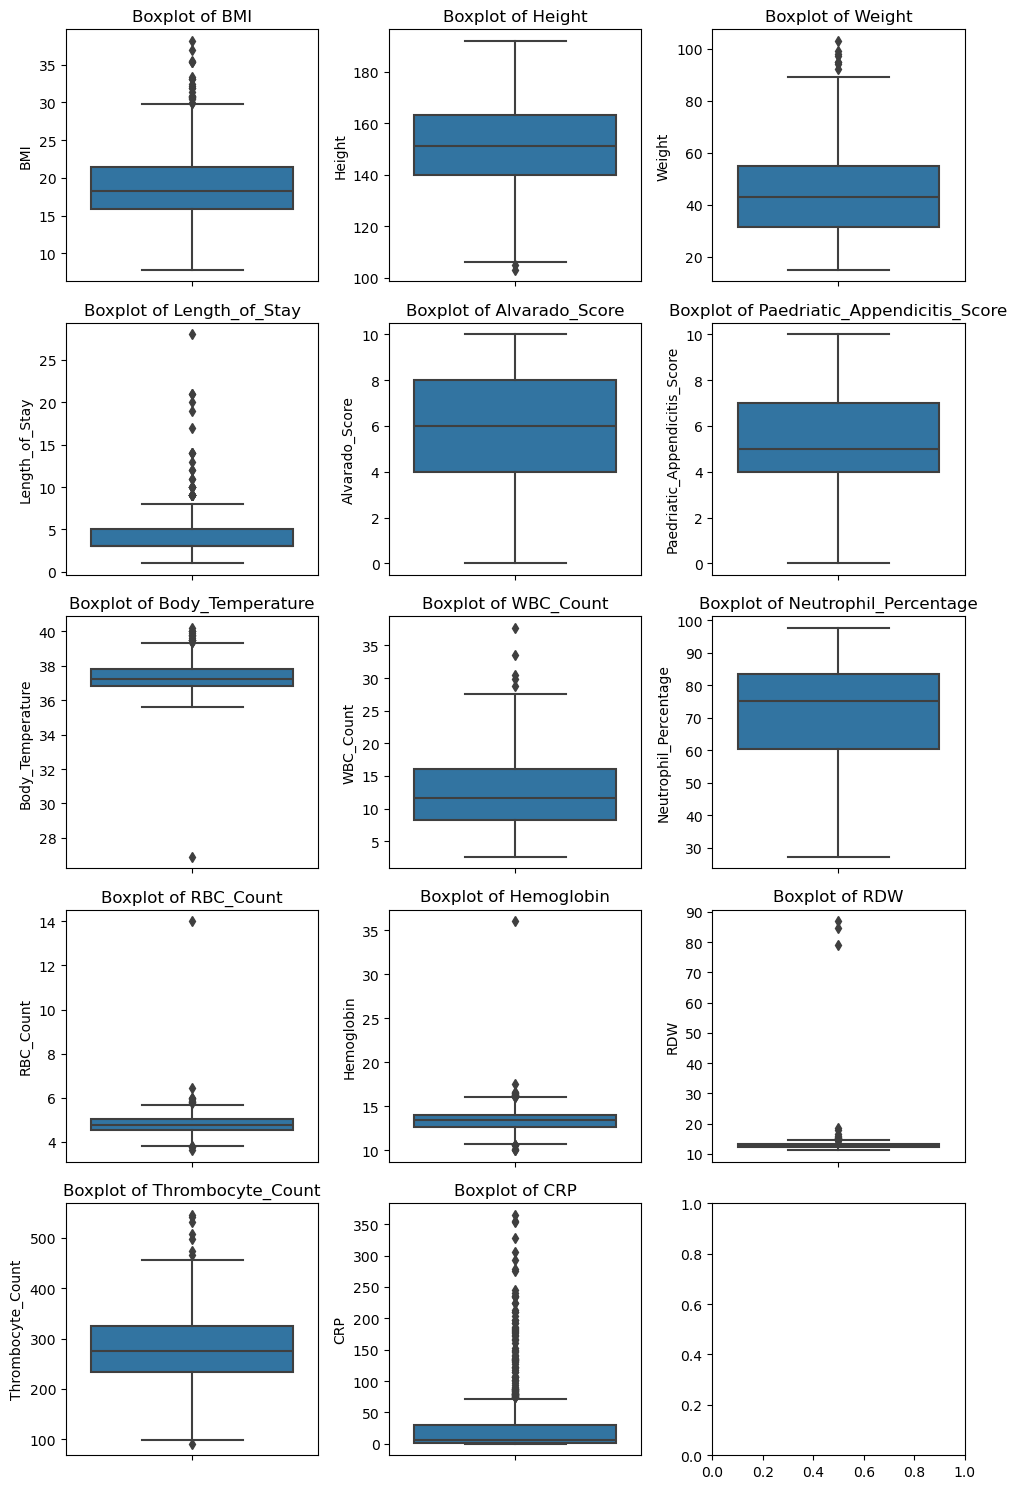

In [12]:
# Create individual boxplots for each float column
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 15))
axes = axes.flatten()
# Iterate through each float column and create a boxplot
for i, col in enumerate(float_cols):
    ax = axes[i]
    sn.boxplot(y=data[col], ax=ax, orient='v')
    ax.set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

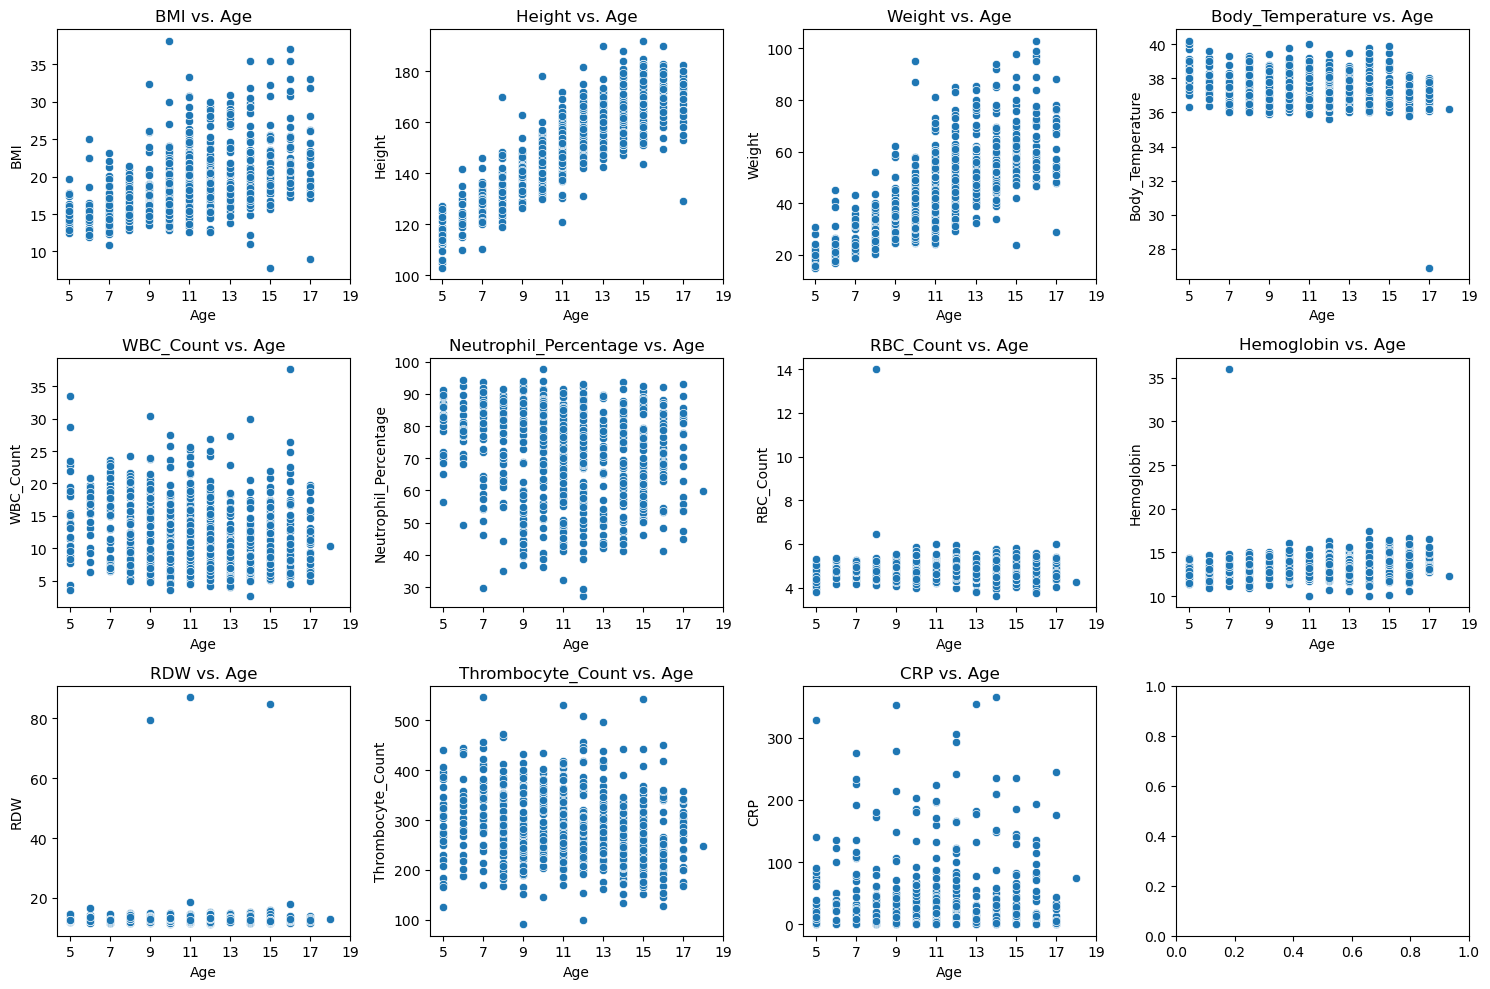

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

def scatter_plot_agewise(data, column_name, ax):
    sns.scatterplot(x='Age', y=column_name, data=data, ax=ax)
    ax.set_title(f'{column_name} vs. Age')
    ax.set_xlabel('Age')
    ax.set_ylabel(column_name)
    ax.set_xticks(range(5, 21, 2))  

# List of columns to create scatter plots for
columns_to_plot = ['BMI', 'Height', 'Weight', 'Body_Temperature', 'WBC_Count', 'Neutrophil_Percentage', 'RBC_Count', 'Hemoglobin', 'RDW', 'Thrombocyte_Count', 'CRP']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

# Flatten the 2D array of axes
axes = axes.flatten()

# Generate scatter plots for each column
for i, column in enumerate(columns_to_plot):
    scatter_plot_agewise(data, column, axes[i])

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


In [14]:
'''From the scatterplot matrix, we can already see some issues with the data set:

    There are some clear outliers in the measurements that may be erroneous:

    1. body temperature for humans34 °C (93.2 °F) – Severe shivering, loss of movement of fingers, blueness, 
                                                    and confusion. Some behavioral changes may take place.
                (https://en.wikipedia.org/wiki/Human_body_temperature)
    2. remove data with anomally big RDW -remove rdw grater than 25
                https://www.healthline.com/health/rdw-blood-test#outlook
    3. Hemoglobin cannot be greater than 24 (https://images.app.goo.gl/q5TTvbzi3oVCen4MA)
    4. RBC Count - remove rbc greater than 8 
'''

'From the scatterplot matrix, we can already see some issues with the data set:\n\n    There are some clear outliers in the measurements that may be erroneous:\n\n    1. body temperature for humans34 °C (93.2 °F) – Severe shivering, loss of movement of fingers, blueness, \n                                                    and confusion. Some behavioral changes may take place.\n                (https://en.wikipedia.org/wiki/Human_body_temperature)\n    2. remove data with anomally big RDW -remove rdw grater than 25\n                https://www.healthline.com/health/rdw-blood-test#outlook\n    3. Hemoglobin cannot be greater than 24 (https://images.app.goo.gl/q5TTvbzi3oVCen4MA)\n    4. RBC Count - remove rbc greater than 8 \n'

In [15]:
# - remove anomally cold patients
rows_to_drop = data[(data['Body_Temperature'] <= 34)].index
data = data.drop(rows_to_drop)

# - remove anomally big RBC_Count
rows_to_drop = data[(data['RBC_Count'] > 8)].index
data = data.drop(rows_to_drop)

# - remove anomally big hemoglobin
rows_to_drop = data[(data['Hemoglobin'] > 24)].index
data = data.drop(rows_to_drop)

# - remove anomally big RDW
rows_to_drop = data[(data['RDW'] > 25)].index
data = data.drop(rows_to_drop)

In [16]:
#https://redcliffelabs.com/myhealth/lab-test/heart-test/crp-test-what-is-crp-test-what-levels-of-crp-are-dangerous/

In [17]:
data.dropna(subset=['Sex','Diagnosis'], inplace=True)

In [18]:
def fill_nan_for_age_group(data, age_group_column, value_columns):
    # Calculate the mean values for each age group
    average_values = data.groupby(age_group_column)[value_columns].transform('mean')

    # Fill missing values with the average values for the corresponding age group
    data[value_columns] = data[value_columns].fillna(average_values)

    # Iterate through age groups and fill NaN values with the average from the previous age group
    unique_age_groups = data[age_group_column].unique()
    for age_group in unique_age_groups:
        current_group_indices = data[age_group_column] == age_group
        previous_age_group = age_group - 1

        # Check if all values in the current age group are NaN for each value column
        for value_column in value_columns:
            if data.loc[current_group_indices, value_column].isna().all():
                print(f"All values in the age group {age_group} for {value_column} are NaN.")

                # Print information about the previous age group
                print(f"Avg. {value_column} in the previous age group ({previous_age_group}):")
                print(data.loc[data[age_group_column] == previous_age_group, value_column].mean())

                # If all values are NaN, fill them with the average value from the previous age group
                average_previous_age_group = data.loc[data[age_group_column] == previous_age_group, value_column].mean()

                if not np.isnan(average_previous_age_group):  # Check if the average is not NaN
                    print(f"Filling NaN values with the average {value_column} from the previous age group: {average_previous_age_group}")
                    data.loc[current_group_indices, value_column] = data.loc[current_group_indices, value_column].fillna(average_previous_age_group)
                else:
                    print(f"Unable to calculate the average {value_column} from the previous age group.")
        # Define a custom rounding function
    def custom_round(x, decimal_places):
        if decimal_places == 0:
            return round(x)
        elif decimal_places == 1:
            return round(x, 1)
        else:
            return x  # No rounding for other cases

    # Round the values based on column name
    for col in value_columns:
        if col == 'Height':
            data[col] = data[col].apply(lambda x: custom_round(x, decimal_places=0))
        elif col == 'Weight':
            data[col] = data[col].apply(lambda x: custom_round(x, decimal_places=1))

In [19]:
# Apply the function to fill NaN values for the 'Height' and 'Weight' columns based on age groups
fill_nan_for_age_group(data, 'Age', ['Height', 'Weight'])
# Display the 'Height' values for patients with NaN BMI
heights_with_nan_bmi = data.loc[data['BMI'].isna(), 'Height'] / 100
print(heights_with_nan_bmi)
# Display the 'weight' values for patients with NaN BMI
weights_with_nan_bmi = data.loc[data['BMI'].isna(), 'Weight']
print(weights_with_nan_bmi)

All values in the age group 18 for Height are NaN.
Avg. Height in the previous age group (17):
167.10416666666663
Filling NaN values with the average Height from the previous age group: 167.10416666666663
All values in the age group 18 for Weight are NaN.
Avg. Weight in the previous age group (17):
62.19200000000001
Filling NaN values with the average Weight from the previous age group: 62.19200000000001
7      1.29
27     1.67
34     1.50
36     1.15
37     1.63
40     1.68
49     1.68
70     1.40
76     1.57
83     1.63
90     1.35
137    1.15
163    1.63
183    1.44
199    1.62
490    1.15
495    1.57
499    1.67
524    1.29
550    1.68
579    1.35
593    1.29
645    1.62
730    1.63
750    1.62
Name: Height, dtype: float64
7      21.5
27     52.0
34     45.0
36     19.5
37     50.0
40     54.0
49     52.0
70     25.0
76     39.0
83     54.0
90     33.8
137    23.0
163    75.0
183    36.0
199    48.0
490    20.5
495    50.0
499    62.2
524    25.0
550    59.0
579    24.0
593    23.0

In [20]:
# Function to calculate BMI
def calculate_bmi(weight_kg, height_m):
    bmi = weight_kg / (height_m ** 2)
    return round(bmi, 1)  # Round BMI to one decimal place

# Identify rows with missing BMI values
missing_bmi_rows = data[data['BMI'].isna()]

# Apply the BMI calculation formula only for the selected rows
data.loc[missing_bmi_rows.index, 'BMI'] = calculate_bmi(weights_with_nan_bmi, heights_with_nan_bmi)

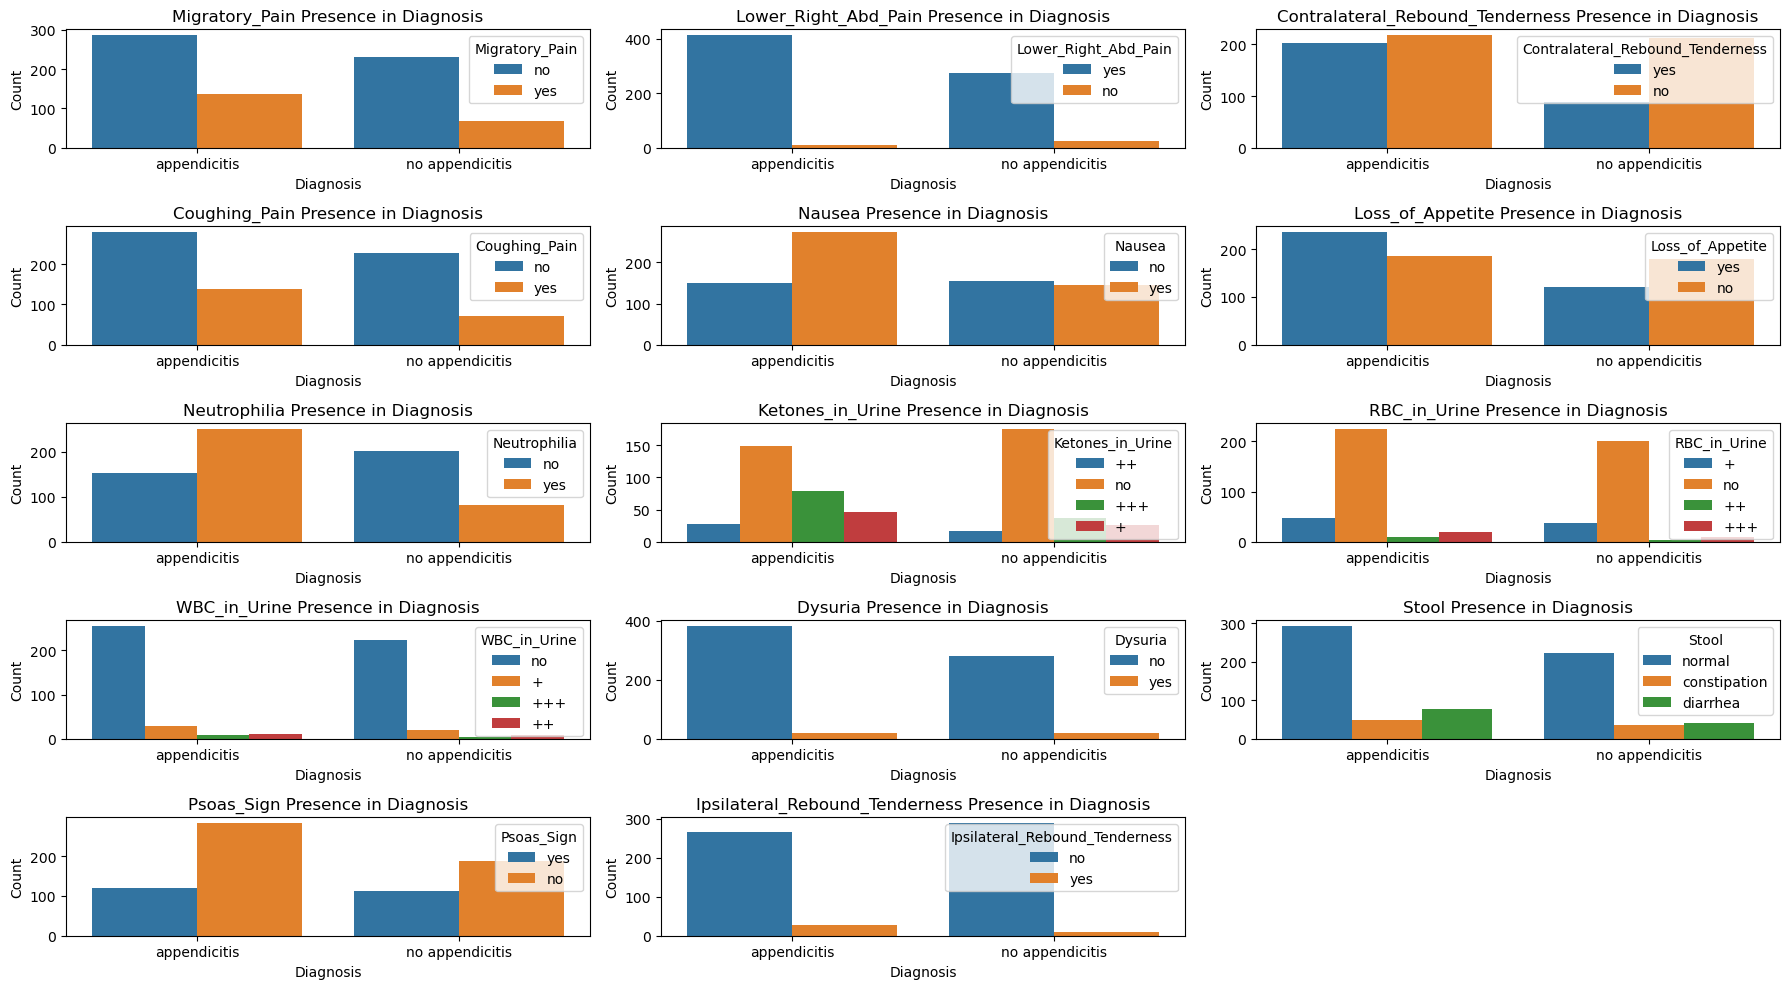

In [21]:
def plot_diagnosis_vs_symptoms(data, symptoms_columns):
    # Set the size of the plots
    plt.figure(figsize=(18, 10))
    
    # Total number of symptom columns
    total_columns = len(symptoms_columns)
    
    # Define number of rows and columns for subplot
    n_rows = total_columns // 3 + (total_columns % 3 > 0)
    n_cols = 3
    
    for index, symptom in enumerate(symptoms_columns, 1):
        plt.subplot(n_rows, n_cols, index)
        sn.countplot(x='Diagnosis', hue=symptom, data=data)
        
        plt.title(f'{symptom} Presence in Diagnosis')
        plt.xlabel('Diagnosis')
        plt.ylabel('Count')
        plt.legend(title=symptom, loc='upper right')
        
        # Adjust subplot params for better layout
        plt.tight_layout()

# List of symptom columns
symptoms_columns = ['Migratory_Pain', 'Lower_Right_Abd_Pain', 'Contralateral_Rebound_Tenderness', 
                    'Coughing_Pain', 'Nausea', 'Loss_of_Appetite', 'Neutrophilia', 'Ketones_in_Urine', 
                    'RBC_in_Urine', 'WBC_in_Urine', 'Dysuria', 'Stool', 'Psoas_Sign', 
                    'Ipsilateral_Rebound_Tenderness']

# Call the function with the DataFrame and the list of symptom columns
plot_diagnosis_vs_symptoms(data, symptoms_columns)

In [22]:
def fill_categorical_nan_with_mode_by_diagnosis(data, column_names, diagnosis_column='Diagnosis'):
    # Iterate through each diagnosis group
    for diagnosis in data[diagnosis_column].unique():
        # Get indices for current diagnosis
        diag_indices = data[data[diagnosis_column] == diagnosis].index
        
        for column_name in column_names:
            # Calculate the mode for the current diagnosis group and symptom
            mode_value = data.loc[diag_indices, column_name].mode()[0] if not data.loc[diag_indices, column_name].mode().empty else None
            
            # If a mode exists, fill NaN values for this diagnosis group and symptom
            if mode_value is not None:
                data.loc[diag_indices, column_name] = data.loc[diag_indices, column_name].fillna(mode_value)

# Example usage
column_names = ['Migratory_Pain', 'Lower_Right_Abd_Pain', 'Contralateral_Rebound_Tenderness', 'Coughing_Pain', 'Nausea', 
                'Loss_of_Appetite', 'Neutrophilia', 'Ketones_in_Urine', 'RBC_in_Urine', 'WBC_in_Urine', 'Dysuria', 
                'Stool', 'Psoas_Sign', 'Ipsilateral_Rebound_Tenderness']

fill_categorical_nan_with_mode_by_diagnosis(data, column_names, diagnosis_column='Diagnosis')


In [23]:
def fill_numerical_nan_with_avg_by_diagnosis(data, column_names, diagnosis_column='Diagnosis'):
    # Define decimal places for each column
    decimal_places = {
        'Length_of_Stay':0, 'Body_Temperature': 1, 'WBC_Count': 0, 'Neutrophil_Percentage': 1, 'RBC_Count': 2,
        'Hemoglobin': 1,'RDW': 1,'Thrombocyte_Count': 0,'CRP': 0}
    
    # Iterate through each diagnosis group
    for diagnosis in data[diagnosis_column].unique():
        # Get indices for the current diagnosis
        diag_indices = data[data[diagnosis_column] == diagnosis].index
        
        for column_name in column_names:
            # Calculate the average for the current diagnosis group and column
            avg_value = data.loc[diag_indices, column_name].mean()
            
            # If an average exists, fill NaN values for this diagnosis group and column
            if not pd.isna(avg_value):
                # Round the average value to the specified decimal places
                decimal_place = decimal_places.get(column_name, 2)  # Default to 2 decimal places
                avg_value_rounded = round(avg_value, decimal_place)
                data.loc[diag_indices, column_name] = data.loc[diag_indices, column_name].fillna(avg_value_rounded)

# Example usage
float_column_names = ['Length_of_Stay', 'Body_Temperature', 'WBC_Count', 'Neutrophil_Percentage', 'RBC_Count', 
                      'Hemoglobin','RDW', 'Thrombocyte_Count', 'CRP']

fill_numerical_nan_with_avg_by_diagnosis(data, float_column_names, diagnosis_column='Diagnosis')

In [24]:
data['WBC_Count'] = data['WBC_Count'] * 1000

In [25]:
#https://en.wikipedia.org/wiki/Alvarado_score
def calculate_alvarado_score(row):
    score = 0
    # Symptoms
    if row['Migratory_Pain'] == 'yes':
        score += 1
    if row['Nausea'] == 'yes':
        score += 1
    if row['Loss_of_Appetite'] == 'yes':
        score += 1
    # Signs
    if row['Lower_Right_Abd_Pain'] == 'yes':
        score += 2
    if row['Contralateral_Rebound_Tenderness'] == 'yes':
        score += 1
    if row['Body_Temperature'] >= 37.3:
        score += 1
    # Laboratory findings
    if row['WBC_Count'] > 10000:
        score += 2
    if row['Neutrophil_Percentage'] > 70:
        score += 1
    return score

# Example usage
data['Calculated_Alvarado_Score'] = data.apply(calculate_alvarado_score, axis=1)
data['Alvarado_Score'].fillna(data['Calculated_Alvarado_Score'], inplace=True)

In [26]:
def calculate_paediatric_score(row):
    score = 0
    # Symptoms
    if row['Migratory_Pain'] == 'yes':
        score += 1
    if row['Nausea'] == 'yes':
        score += 1
    if row['Loss_of_Appetite'] == 'yes':
        score += 1
    # Signs
    if row['Lower_Right_Abd_Pain'] == 'yes':#
        score += 2
    if row['Coughing_Pain'] == 'yes':
        score += 2
    if row['Body_Temperature'] >= 37.3:
        score += 1
    # Laboratory findings
    if row['WBC_Count'] > 10000:
        score += 1
    if row['Neutrophil_Percentage'] > 70:
        score += 1
    return score

# Example usage
data['Calculated_Paediatric_Score'] = data.apply(calculate_paediatric_score, axis=1)
data['Paedriatic_Appendicitis_Score'].fillna(data['Calculated_Paediatric_Score'], inplace=True)

In [27]:
data.drop(columns=['Calculated_Paediatric_Score','Calculated_Alvarado_Score'],inplace=True)

In [28]:
data.isnull().sum()

Age                                 0
BMI                                 0
Sex                                 0
Height                              0
Weight                              0
Length_of_Stay                      0
Management                          0
Severity                            0
Diagnosis_Presumptive               0
Diagnosis                           0
Alvarado_Score                      0
Paedriatic_Appendicitis_Score       0
Migratory_Pain                      0
Lower_Right_Abd_Pain                0
Contralateral_Rebound_Tenderness    0
Coughing_Pain                       0
Nausea                              0
Loss_of_Appetite                    0
Body_Temperature                    0
WBC_Count                           0
Neutrophil_Percentage               0
Neutrophilia                        0
RBC_Count                           0
Hemoglobin                          0
RDW                                 0
Thrombocyte_Count                   0
Ketones_in_U

In [29]:
print("columns : ",len(data.columns))
print("rows : ",len(data.index))

columns :  34
rows :  731


In [33]:
#pip install googletrans==4.0.0-rc1

Note: you may need to restart the kernel to use updated packages.


In [34]:
from googletrans import Translator

translator = Translator()

# Get unique values from 'Diagnosis_Presumptive'
unique_values = data['Diagnosis_Presumptive'].unique()

# Translate unique values
translations = [translator.translate(value, dest='en').text for value in unique_values]

# Create a dictionary to map original values to translated values
translation_dict = dict(zip(unique_values, translations))

# Create a new column with translated values
data['Diagnosis_Presumptive_English'] = data['Diagnosis_Presumptive'].map(translation_dict)
unique_translated = data['Diagnosis_Presumptive_English'].unique()

In [35]:
# Get unique values for 'Diagnosis_Presumptive' and 'Diagnosis_Presumptive_English'
unique_original = pd.Series(data['Diagnosis_Presumptive'].unique(), name='Diagnosis_Presumptive')
unique_translated = pd.Series(data['Diagnosis_Presumptive_English'].unique(), name='Diagnosis_Presumptive_English')

# Create a DataFrame with the unique values
unique_values_df = pd.DataFrame({'Original': unique_original, 'Translated': unique_translated})

# Display the DataFrame
print(unique_values_df)

                                             Original  \
0                                        appendicitis   
1           Appendizitis/ Lymphadenitis mesenterialis   
2                                     no appendicitis   
3                             chronische Appendizitis   
4                                      Ovarialtorsion   
5                                     Gastroenteritis   
6                           chronische Bauchschmerzen   
7                      Sepsis mit Begleitappendizitis   
8                                  Torsion der Adnexe   
9   abdominelle Adhäsionen, chron. Unterbauchbesch...   
10                     Adhäsionen des Colon ascendens   
11                                        Bridenileus   

                                           Translated  
0                                        appendicitis  
1          Appendizitis / lymphadenitis mesenterialis  
2                                     no appendicitis  
3                                C

In [36]:
# Replace 'Diagnosis_Presumptive' with 'Diagnosis_Presumptive_English'
data['Diagnosis_Presumptive'] = data['Diagnosis_Presumptive_English']

# Drop the 'Diagnosis_Presumptive_English' column if you don't need it anymore
data.drop('Diagnosis_Presumptive_English', axis=1, inplace=True)

In [37]:
# Diagnosis_Presumptive
# fix typo
data.loc[data['Diagnosis_Presumptive'] == 'Appendizitis / lymphadenitis mesenterialis', 'Diagnosis_Presumptive'] = 'Appendizitis, lymphadenitis mesenterialis'

In [38]:
data.to_excel('Appendicitis.xlsx', index=False)